In [1]:
import os, sys
print(os.getcwd())

import warnings
warnings.filterwarnings("ignore")

/home/mainuser/code


In [2]:
from cholect50 import dataloader_tf as dataloader
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# GPU Config
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 2 Logical GPUs


In [4]:
dataset = dataloader.CholecT50( 
          dataset_dir="CholecT50", 
          dataset_variant="cholect50",
          test_fold=1,
          augmentation_list=['original'],
          num_parallel_calls=100
          )

In [5]:
# build dataset
train_dataset, val_dataset, test_dataset = dataset.build()

In [6]:
# train and val data loaders
train_dataloader = train_dataset.batch(16) # see tf.data.Dataset for more options
val_dataloader   = val_dataset.batch(16)

# test data set is built per video, so load differently
test_dataloaders = []
for video_dataset in test_dataset:
    test_dataloader = video_dataset.batch(16)
    test_dataloaders.append(test_dataloader)
    
train_dataloader = train_dataloader.cache().prefetch(tf.data.AUTOTUNE)
val_dataloader = val_dataloader.cache().prefetch(tf.data.AUTOTUNE)

In [7]:
instruments = [
    "Grasper",
    "Bipolar",
    "Hook",
    "Scissors",
    "Clipper",
    "Irrigator"
]

for (img_list, (ivt_list, i_list, v_list, t_list, p_list)) in train_dataloader.take(1):
    i = i_list[0]
    l = [x==1 for x in i.numpy()]

2023-04-12 18:37:01.668292: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


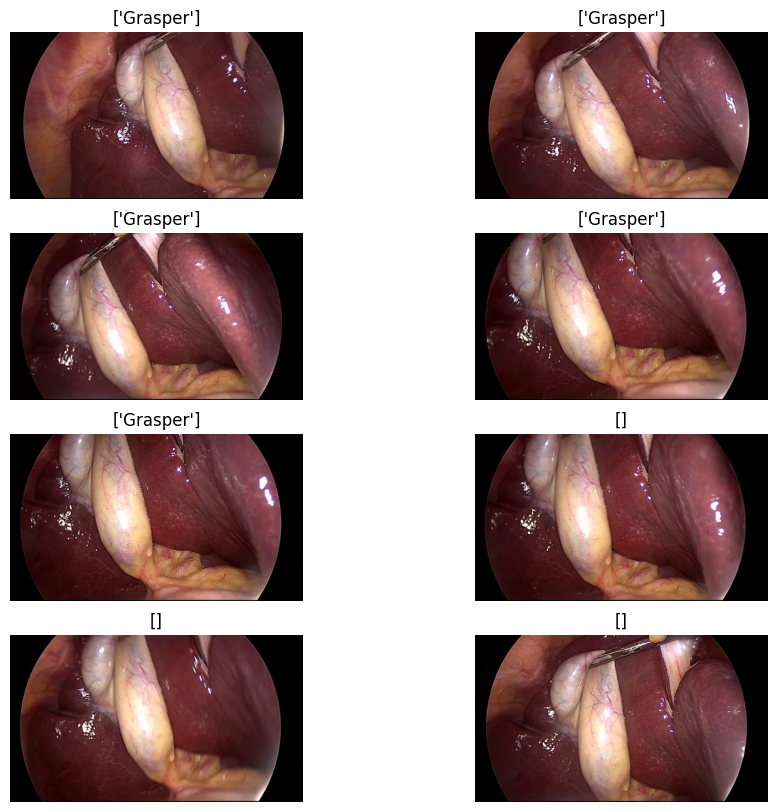

In [8]:
lis = np.array(instruments)
fil = np.array(l)

fig, axs = plt.subplots(4, 2, figsize=(12, 10))

img = img_list[0]

for idx in range(4):
    for jdx in range(2):
        axs[idx, jdx].imshow((img.numpy()[idx*2+jdx]).astype(np.uint8))
        axs[idx, jdx].set_title(str(lis[fil[idx*2+jdx]]))
        axs[idx, jdx].axis('off')

plt.subplots_adjust(wspace=0, hspace=0.2)
plt.show()

In [10]:
print(l)

[array([ True, False, False, False, False, False]), array([ True, False, False, False, False, False]), array([ True, False, False, False, False, False]), array([ True, False, False, False, False, False]), array([ True, False, False, False, False, False]), array([False, False, False, False, False, False]), array([False, False, False, False, False, False]), array([False, False, False, False, False, False]), array([False, False, False, False, False, False]), array([False, False, False, False, False, False]), array([ True, False, False, False, False, False]), array([ True, False, False, False, False, False]), array([ True, False, False, False, False, False]), array([ True, False, False, False, False, False]), array([ True, False, False, False, False, False]), array([ True, False, False, False, False, False])]
